In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('/home/amelchukova@ozon/prep/titanic.csv')
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
data['pref'] = data['Name'].apply(lambda f: f.split()[0].split('.')[0])
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,pref
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,Mr
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,Mrs
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,Miss
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,Mrs
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,Mr


In [4]:
data['male'] = pd.get_dummies(data['Sex'], drop_first=True)
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,pref,male
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,Mr,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,Mrs,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,Miss,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,Mrs,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,Mr,1


In [16]:
train, test = train_test_split(data.drop(['Sex', 'Name'], axis=1), test_size=0.2, random_state=42)

In [19]:
train.pivot_table(columns='male', index='pref', values='Siblings/Spouses Aboard', aggfunc='count')

male,0,1
pref,,
Capt,NaN,1.0
Dr,1.0,3.0
Jonkheer,NaN,1.0
Lady,1.0,NaN
Major,NaN,1.0
Master,NaN,30.0
Miss,157.0,NaN
Mlle,2.0,NaN
Mme,1.0,NaN


In [20]:
train.query('Age <= 13')['pref'].unique()

array(['Miss', 'Master', 'Mr'], dtype=object)

In [6]:
pref_stat = dict(
    list(train.groupby('pref')['Survived'].agg(['count', 'sum']).reset_index().apply(lambda f: (f['pref'], (f['count'], f['sum'])), axis=1))
)
pref_stat

{'Capt': (1, 0),
 'Dr': (4, 3),
 'Jonkheer': (1, 0),
 'Lady': (1, 1),
 'Major': (1, 1),
 'Master': (30, 15),
 'Miss': (157, 111),
 'Mlle': (2, 2),
 'Mme': (1, 1),
 'Mr': (409, 61),
 'Mrs': (97, 78),
 'Ms': (1, 1),
 'Rev': (3, 0),
 'the': (1, 1)}

In [7]:
train['pref_te'] = train.apply(
    lambda f: train['Survived'].mean() if pref_stat[f['pref']][0] == 1 else (pref_stat[f['pref']][1] - f['Survived']) / (pref_stat[f['pref']][0] - 1), axis=1
)
train.drop(['pref'], inplace=True, axis=1)
display(train.head())
train.info()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,pref_te
730,0,2,23.0,0,0,13.000,1,0.149510
390,0,3,28.0,2,0,7.925,1,0.149510
118,0,3,2.0,4,2,31.275,0,0.711538
440,1,2,28.0,0,0,13.000,0,0.387870
309,1,1,18.0,2,2,262.375,0,0.705128


<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 730 to 102
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 709 non-null    int64  
 1   Pclass                   709 non-null    int64  
 2   Age                      709 non-null    float64
 3   Siblings/Spouses Aboard  709 non-null    int64  
 4   Parents/Children Aboard  709 non-null    int64  
 5   Fare                     709 non-null    float64
 6   male                     709 non-null    uint8  
 7   pref_te                  709 non-null    float64
dtypes: float64(3), int64(4), uint8(1)
memory usage: 45.0 KB


In [8]:
train.corr()['Survived']

Survived                   1.000000
Pclass                    -0.350110
Age                       -0.044833
Siblings/Spouses Aboard   -0.053490
Parents/Children Aboard    0.061103
Fare                       0.262981
male                      -0.568758
pref_te                    0.577463
Name: Survived, dtype: float64

In [9]:
test['pref_te'] = test.apply(
    lambda f: 
    train['Survived'].mean() if pd.isna(pref_stat.get(f['pref'])) or pref_stat[f['pref']][0] == 1
    else (pref_stat[f['pref']][1] - f['Survived']) / (pref_stat[f['pref']][0] - 1)
    , axis=1
)
test.drop(['pref'], inplace=True, axis=1)
display(test.head())
test.info()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,pref_te
296,1,1,47.0,0,0,30.5000,1,0.147059
682,0,2,25.0,1,2,41.5792,1,0.149510
535,0,3,69.0,0,0,14.5000,1,0.149510
644,1,1,56.0,0,0,35.5000,1,0.387870
623,0,2,57.0,0,0,12.3500,1,0.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 296 to 762
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 178 non-null    int64  
 1   Pclass                   178 non-null    int64  
 2   Age                      178 non-null    float64
 3   Siblings/Spouses Aboard  178 non-null    int64  
 4   Parents/Children Aboard  178 non-null    int64  
 5   Fare                     178 non-null    float64
 6   male                     178 non-null    uint8  
 7   pref_te                  178 non-null    float64
dtypes: float64(3), int64(4), uint8(1)
memory usage: 11.3 KB


In [10]:
features_train_1 = train.drop(['Survived', 'pref_te'], axis=1)
features_train_2 = train.drop(['Survived'], axis=1)
target_train = train['Survived']

features_test_1 = test.drop(['Survived', 'pref_te'], axis=1)
features_test_2 = test.drop(['Survived'], axis=1)
target_test = test['Survived']

In [11]:
model = DecisionTreeClassifier(max_depth=2, random_state=3)

model.fit(features_train_1, target_train)
print(f'ROC AUC SCORE: {roc_auc_score(target_test, model.predict_proba(features_test_1)[:, 1])}')

ROC AUC SCORE: 0.7634126663977411


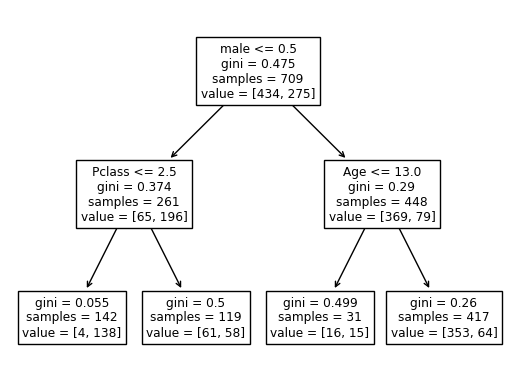

In [12]:
# выводим дерево
plot_tree(model, feature_names=features_train_1.columns);

In [13]:
model = DecisionTreeClassifier(max_depth=2, random_state=3)

model.fit(features_train_2, target_train)
print(f'ROC AUC SCORE: {roc_auc_score(target_test, model.predict_proba(features_test_2)[:, 1])}')

ROC AUC SCORE: 0.8973376361436063


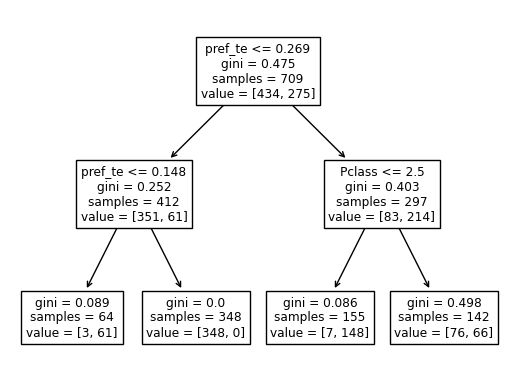

In [14]:
# выводим дерево
plot_tree(model, feature_names=features_train_2.columns);